

---


Nama  : Rofif Ramadhan Khoirulloh Sowija

NPM   : 2257051009

Kelas : D


---



In [ ]:
!pip install kneed

##Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score

##Dataset

In [ ]:
# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/financial_stability_dataset.csv')

# Menampilkan beberapa baris pertama dari dataset
data.head()

,Monthly Income (k$),Monthly Expenses (k$),Savings (k$),Debt (k$),Credit Score,Age,Education,Number of Dependents,Transaction Frequency (transactions/month),Cluster
0,301.381886,32.973187,110.822563,248.429859,689,33,High School,4,13,4
1,87.509803,20.725693,61.192659,147.949023,306,20,Elementary,2,9,1
2,542.820989,68.495979,180.075334,409.147509,528,36,Elementary,0,10,1
3,909.769803,771.107937,713.257583,102.750161,308,26,Associate,3,7,0
4,534.125605,522.050836,1481.054600,473.567688,306,58,Associate,2,8,0


##Preprocessing Data

In [ ]:
# Preprocessing data
# Hapus outlier
df.loc[df['Monthly Income (k$)'] < 0, "Monthly Income (k$)"] = np.nan
df.loc[df["Monthly Income (k$)"] > 100, "Monthly Income (k$)"] = np.nan

# Preprocessing Kolom 'Education'
# Menghapus karakter non-digit dan mengonversi ke tipe data numerik
df['Education'] = df['Education'].str.replace('\D', '', regex=True)
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')

In [ ]:
# Mengisi nilai yang hilang dalam kolom 'Education' dengan rata-rata
df['Education'].fillna(value=df['Education'].mean(), inplace=True)

# Menghapus kolom yang tidak diperlukan
df_clean = df.drop(['Credit Score', 'Education'], axis=1)

In [ ]:
# Pembagian Data
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Preprocessing Data
X_train.loc[X_train['Monthly Income (k$)'] < 0, "Monthly Income (k$)"] = np.nan
X_train.loc[X_train["Monthly Income (k$)"] > 100, "Monthly Income (k$)"] = np.nan
X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True)
X_train['Monthly Income (k$)'].fillna(value=X_train['Monthly Income (k$)'].mean(), inplace=True)
X_train['Monthly Expenses (k$)'].fillna(value=X_train['Monthly Expenses (k$)'].mean(), inplace=True)
X_train['Savings (k$)'].fillna(value=X_train['Savings (k$)'].mean(), inplace=True)
X_train['Debt (k$)'].fillna(value=X_train['Debt (k$)'].mean(), inplace=True)
X_train['Number of Dependents'].fillna(value=X_train['Number of Dependents'].mean(), inplace=True)
X_train['Transaction Frequency (transactions/month)'].fillna(value=X_train['Transaction Frequency (transactions/month)'].mean(), inplace=True)
X_train_clean = X_train.drop(['Credit Score', 'Education'], axis=1)

In [ ]:
# Rescale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)

# Mencari nilai epsilon
nbrs = NearestNeighbors().fit(X_train_scaled)
neigh_dist, _ = nbrs.kneighbors(X_train_scaled)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 4]
kneedle = KneeLocator(x=range(1, len(neigh_dist) + 1), y=k_dist, S=1.0,
                      curve="concave", direction="increasing", online=True)
epsilon = kneedle.knee_y

##Modelling

In [ ]:
# Pemodelan DBSCAN
dbscan_model = DBSCAN(eps=epsilon, min_samples=4).fit(X_train_scaled)
train_labels = dbscan_model.labels_

##Evaluasi

In [ ]:
# Evaluasi menggunakan Silhouette Score
train_silhouette_score = silhouette_score(X_train_scaled, train_labels)
print(f"Akurasi berdasarkan Silhouette score adalah: {train_silhouette_score}")

Akurasi berdasarkan Silhouette score adalah: 0.6694382064634092


##Visualisasi

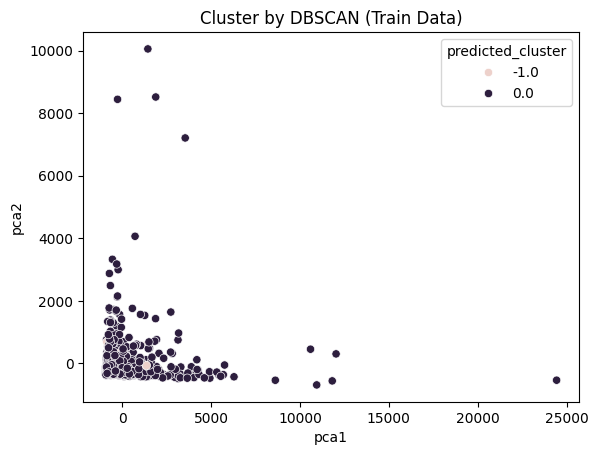

In [ ]:
# Visualisasi
X_train["predicted_cluster"] = train_labels
reduced_data_train = PCA(n_components=2).fit_transform(X_train_clean)
df_reduced_data_train = pd.DataFrame(reduced_data_train, columns=["pca1", "pca2"])
sns.scatterplot(x="pca1", y="pca2", hue=X_train["predicted_cluster"], data=df_reduced_data_train)
plt.title("Cluster by DBSCAN (Train Data)")
plt.show()



---


DBSCAN dipilih karena keunggulannya dalam mendeteksi cluster kompleks tanpa asumsi bentuk tertentu, kemampuannya menangani outlier, dan tidak memerlukan jumlah cluster terdefinisi sebelumnya.

Silhouette Score dipilih karena kemampuannya mengukur kualitas cluster dan cocok untuk evaluasi clustering tanpa label seperti yang dilakukan oleh DBSCAN. Dengan demikian, DBSCAN dan Silhouette Score dipilih karena keunggulan masing-masing dalam menangani data tanpa label dan cluster dengan bentuk yang kompleks, serta tidak memerlukan jumlah cluster terdefinisi sebelumnya.


---

